=== Original Dataset ===
   EngineSize  Cylinders  FuelConsumption  CO2Emissions
0         1.0          3              5.9           100
1         1.3          4              6.1           110
2         1.5          4              6.5           115
3         1.8          4              7.2           125
4         2.0          4              7.8           135
5         2.2          6              8.5           145
6         2.5          6              9.0           155
7         3.0          6             10.5           170
8         3.2          8             11.0           180
9         3.5          8             12.0           195

Intercept (b₀): 44.028112956092656
Coefficients (b₁, b₂, b₃): [21.96808702  2.40481936  4.52130533]

Mean Squared Error: 5.464313824827525
R² Score: 0.9955393356532021

=== Actual vs Predicted ===
   Actual   Predicted
8     180  183.298905
1     110  109.785866


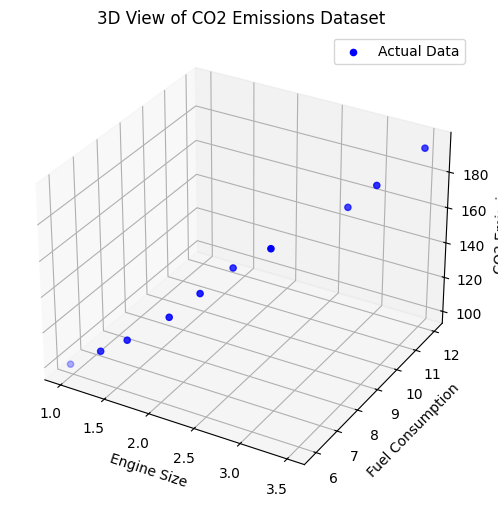

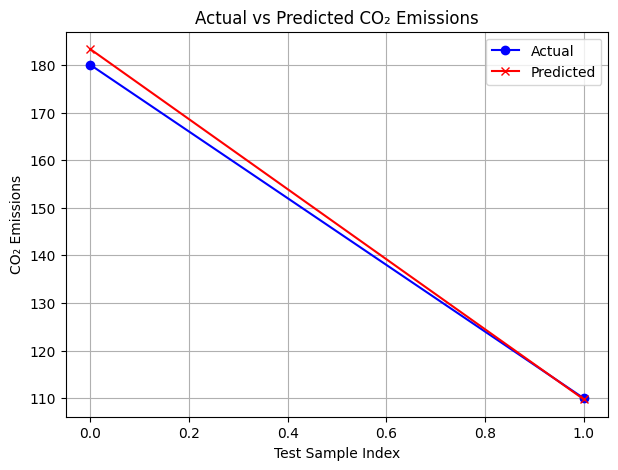

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


data = {
    'EngineSize': [1.0, 1.3, 1.5, 1.8, 2.0, 2.2, 2.5, 3.0, 3.2, 3.5],
    'Cylinders': [3, 4, 4, 4, 4, 6, 6, 6, 8, 8],
    'FuelConsumption': [5.9, 6.1, 6.5, 7.2, 7.8, 8.5, 9.0, 10.5, 11.0, 12.0],
    'CO2Emissions': [100, 110, 115, 125, 135, 145, 155, 170, 180, 195]
}
df = pd.DataFrame(data)

print("=== Original Dataset ===")
print(df)


X = df[['EngineSize', 'Cylinders', 'FuelConsumption']]
Y = df['CO2Emissions']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, Y_train)


Y_pred = model.predict(X_test)


print("\nIntercept (b₀):", model.intercept_)
print("Coefficients (b₁, b₂, b₃):", model.coef_)

print("\nMean Squared Error:", mean_squared_error(Y_test, Y_pred))
print("R² Score:", r2_score(Y_test, Y_pred))


results = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
print("\n=== Actual vs Predicted ===")
print(results)


fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['EngineSize'], df['FuelConsumption'], df['CO2Emissions'], color='blue', label='Actual Data')
ax.set_xlabel('Engine Size')
ax.set_ylabel('Fuel Consumption')
ax.set_zlabel('CO2 Emissions')
ax.set_title('3D View of CO2 Emissions Dataset')
ax.legend()
plt.show()


plt.figure(figsize=(7,5))
plt.plot(np.arange(len(Y_test)), Y_test.values, marker='o', label='Actual', color='blue')
plt.plot(np.arange(len(Y_pred)), Y_pred, marker='x', label='Predicted', color='red')
plt.title('Actual vs Predicted CO₂ Emissions')
plt.xlabel('Test Sample Index')
plt.ylabel('CO₂ Emissions')
plt.legend()
plt.grid(True)
plt.show()





